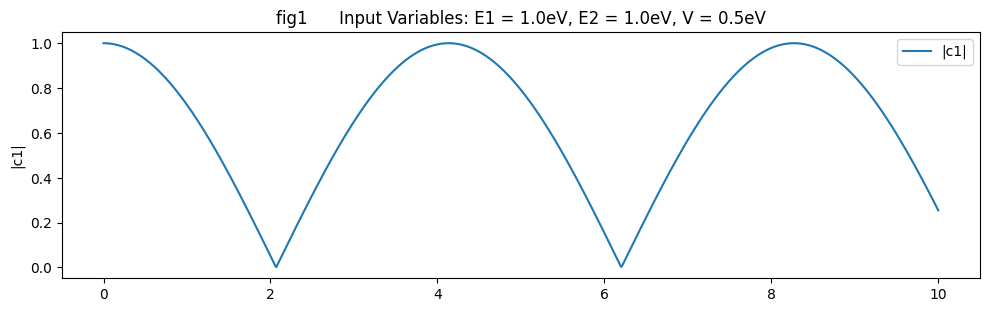

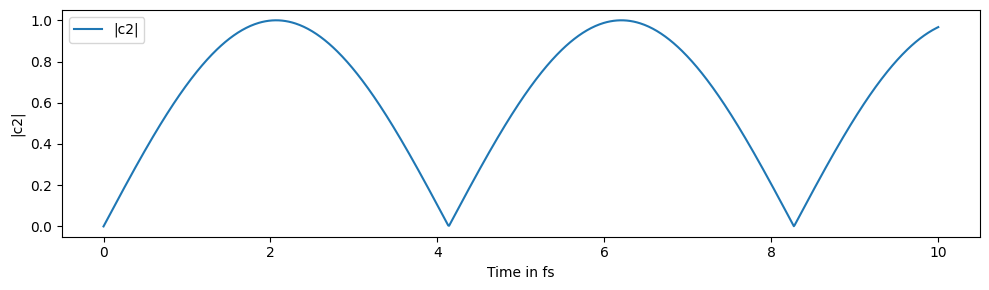

In [11]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 0.6582119514

def read_input_file(file_path):
  with open(file_path, 'r') as file:
    lines = [line for line in file if not line.startswith('#')]
    E1 = float(lines[0].strip())
    E2 = float(lines[1].strip())
    V = float(lines[2].strip())
  return E1, E2, V

t_max = 10
h = 0.01

def dpsi_dt(t, psi, H):
  return -1j * np.dot(H, psi)/hbar

def rk4(t, psi, H, h):
  k1 = dpsi_dt(t, psi, H)
  k2 = dpsi_dt(t + h/2, psi + k1*h/2, H)
  k3 = dpsi_dt(t + h/2, psi + k2*h/2, H)
  k4 = dpsi_dt(t + h, psi + k3*h, H)
  return psi + (k1 + 2*k2 + 2*k3 + k4)*h/6

def time_evolution(t_max, h, c0, H):
  # time grid
  num_steps = int(t_max/h) + 1
  T = np.linspace(0, t_max, num_steps)
  
  Psi = []
  psi = c0
  for t in T:
    Psi.append(psi)
    psi = rk4(t, psi, H, h)
  return Psi, T

c0 = np.array([1, 0])
E1, E2, V = read_input_file('ex2-input.txt')
H = np.array([[E1, V], [V, E2]])

Psi, T = time_evolution(t_max, h, c0, H)

# c1
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 0]), label='|c1|')
plt.ylabel('|c1|')
plt.legend()
plt.tight_layout()
plt.title(f'fig1      Input Variables: E1 = {E1}eV, E2 = {E2}eV, V = {V}eV')
plt.show()

# c2
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 1]), label='|c2|')
plt.xlabel('Time in fs')
plt.ylabel('|c2|')
plt.legend()
plt.tight_layout()
plt.show()

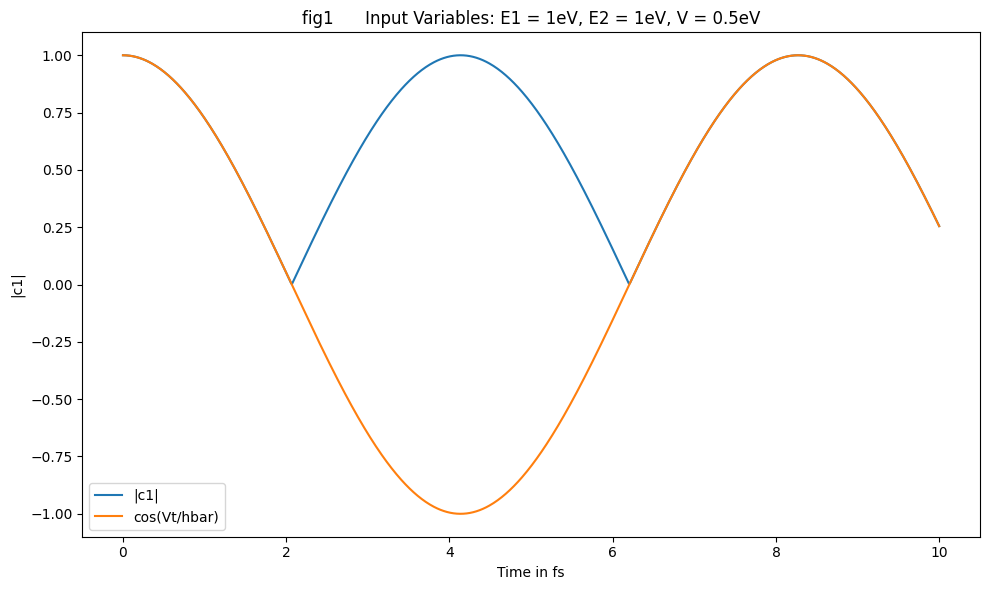

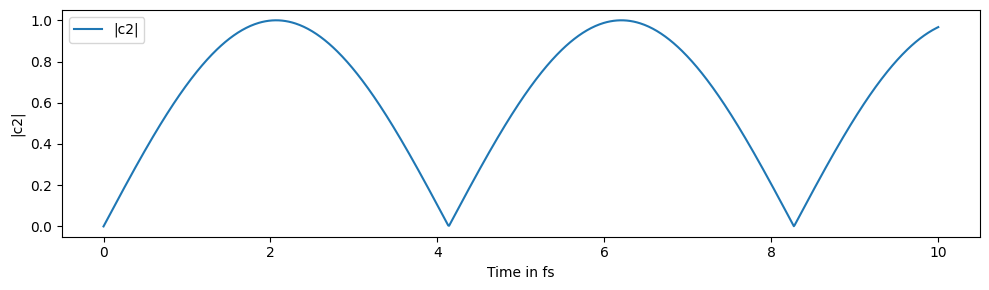

In [12]:
# E1 = E2
E1, E2, V = 1, 1, 0.5
H = np.array([[E1, V], [V, E2]])
Psi, T = time_evolution(t_max, h, c0, H)

plt.figure(figsize=(10, 6))
plt.title(f'fig1      Input Variables: E1 = {E1}eV, E2 = {E2}eV, V = {V}eV')

# c1
plt.plot(T, np.abs(np.array(Psi)[:, 0]), label='|c1|')
plt.plot(T, np.cos(V * T / hbar), label='cos(Vt/hbar)')
plt.xlabel('Time in fs')
plt.ylabel('|c1|')
plt.legend()
plt.tight_layout()
plt.show()

# c2
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 1]), label='|c2|')
plt.xlabel('Time in fs')
plt.ylabel('|c2|')
plt.legend()
plt.tight_layout()
plt.show()

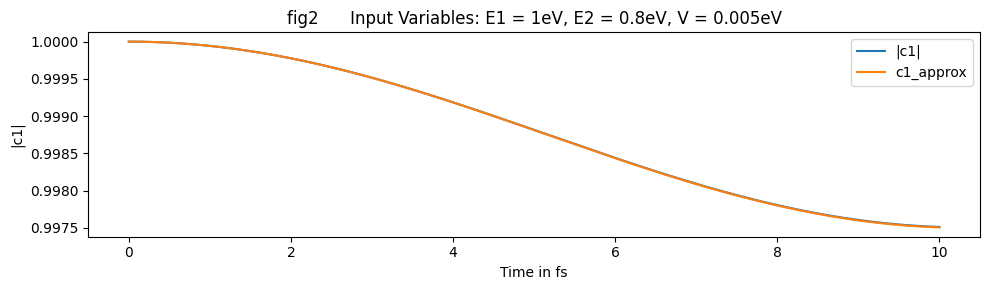

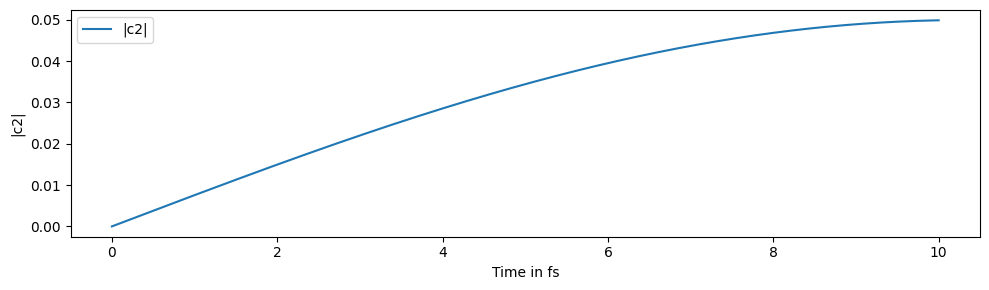

In [13]:
# E1 - E2 >> V
E1, E2, V = 1, 0.8, 0.005
H = np.array([[E1, V], [V, E2]])
Psi, T = time_evolution(t_max, h, c0, H)

DE = abs(E1 - E2)
c1_approx = (1 - 2*(V/DE)**2 * ( 1 - np.cos((DE + 2*V**2/DE)*T/hbar)))

plt.figure(figsize=(10, 3))
plt.title(f'fig2      Input Variables: E1 = {E1}eV, E2 = {E2}eV, V = {V}eV')

# c1
plt.plot(T, np.abs(np.array(Psi)[:, 0])**2, label='|c1|')
plt.plot(T, c1_approx, label='c1_approx')
plt.xlabel('Time in fs')
plt.ylabel('|c1|')
plt.legend()
plt.tight_layout()
plt.show()

# c2
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 1]), label='|c2|')
plt.xlabel('Time in fs')
plt.ylabel('|c2|')
plt.legend()
plt.tight_layout()
plt.show()

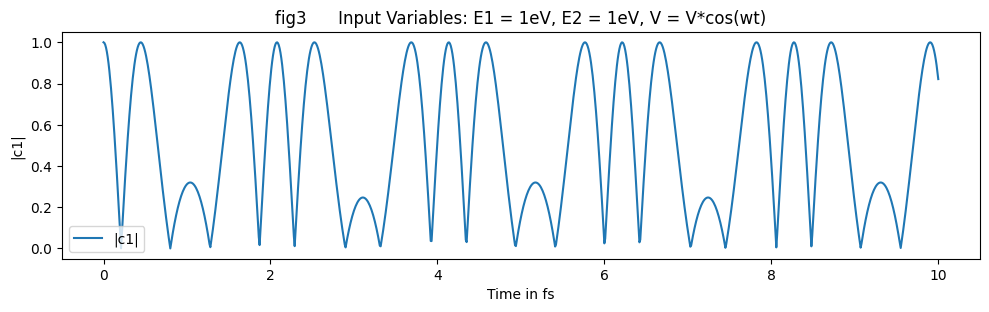

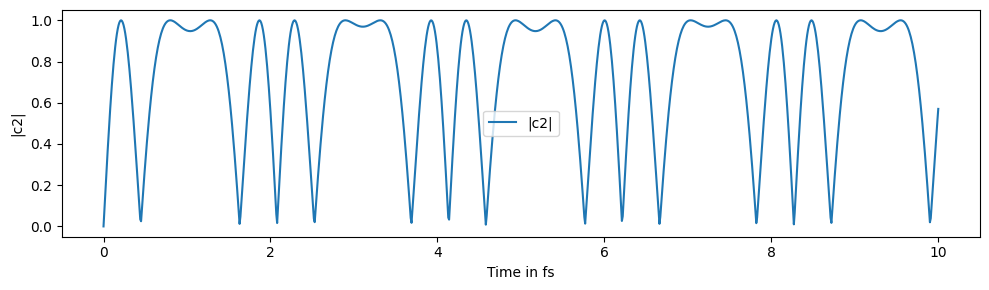

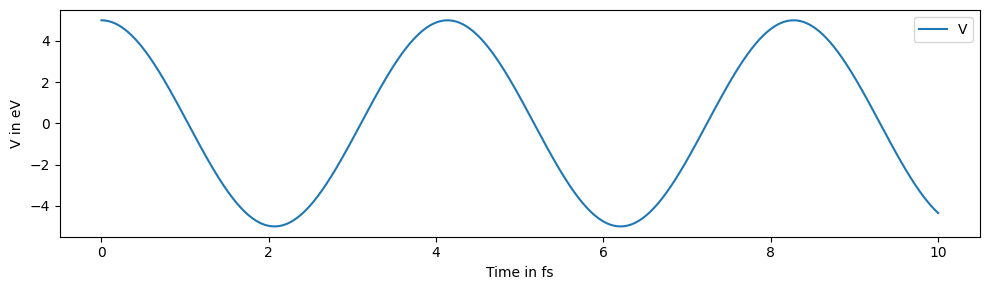

In [14]:
# V = V0*cos(wt)
E1, E2, V = 1, 1, 5
w = 1
def Vcos(w, t):
  return V * np.cos(w*t/hbar)

def time_evolution_V(t_max, h, c0, H):
  # time grid
  num_steps = int((t_max) / h) + 1
  T = np.linspace(0, t_max, num_steps)

  Psi = []
  psi = c0
  for t in T:
    H = np.array([[E1, Vcos(w, t)], [Vcos(w, t), E2]])
    Psi.append(psi)
    psi = rk4(t, psi, H, h)
  return Psi, T

Psi, T = time_evolution_V(t_max, h, c0, H)

# c1
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 0]), label='|c1|')
plt.xlabel('Time in fs')
plt.ylabel('|c1|')
plt.legend()
plt.tight_layout()
plt.title(f'fig3      Input Variables: E1 = {E1}eV, E2 = {E2}eV, V = V*cos(wt)')
plt.show()

# c2
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 1]), label='|c2|')
plt.xlabel('Time in fs')
plt.ylabel('|c2|')
plt.legend()
plt.tight_layout()
plt.show()

#V
plt.figure(figsize=(10, 3))
plt.plot(T, Vcos(w, T), label='V')
plt.xlabel('Time in fs')
plt.ylabel('V in eV')
plt.legend()
plt.tight_layout()
plt.show()